# Business Undersatnding

## Overview

## Business Problem

With limited data visibility across your operations, your company lacks insights needed for strategic decision-making. The current system doesn't provide adequate analytics on sales performance, customer behavior, product popularity, and regional trends, making it difficult to optimize inventory, pricing strategies, and customer relationships. This data gap prevents you from identifying growth opportunities and addressing operational inefficiencies.

## Objectives

### Specific Objectives

Implement a comprehensive data analytics system to track and analyze sales performance across products, customers, and regions

### Objectives

- Data Cleaning: Standardize and preprocess the sales data to ensure accuracy, completeness, and consistency
- Data Analysis: Perform exploratory data analysis to uncover patterns, trends, and relationships within the sales data
- Data Visualization: Create meaningful visual representations of the data to communicate insights effectively
- Modeling: Develop predictive models to forecast sales trends, customer behavior, and product performance
- Evaluation: Assess the performance and accuracy of the developed models
Deployment: Implement the models and insights into business operations for continuous improvement

# Data Understanding

## Data Source
The dataset was collected from Kaggle, a popular platform for data science competitions and datasets. The dataset appears to contain transaction records for a beverage distribution business, focusing on sales of water products to business customers.

## Data Structure
The dataset contains the following fields:

- Order_ID: Unique identifier for each order (e.g., "ORD1")
- Customer_ID: Unique identifier for each customer (e.g., "CUS1496")
- Customer_Type: Classification of customer (e.g., "B2B" for business-to-business)
- Product: Name of the product sold (e.g., "Vio Wasser", "Evian")
- Category: Product category (e.g., "Water")
- Unit_Price: Price per unit of the product (e.g., 1.6, 1.5)
- Quantity: Number of units ordered (e.g., 53, 90)
- Discount: Discount rate applied to the order (e.g., 0.1 or 10%)
- Total_Price: Final price after applying discount (e.g., 79.18, 126.36)
- Region: Geographic location of the sale (e.g., "Baden-Württemberg")
- Order_Date: Date when the order was placed (e.g., "2023-08-23")

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
class DataUnderstanding():
    """This class provides the understanding of the dataset"""
    def __init__(self, data = None):
        """Initialization"""
        self.df = data

    def load_data(self, path):
        """Load Data"""
        if self.df is None:
            self.df = pd.read_csv(path, encoding='latin1')
        return self.df
    
    def understanding(self):
        """Provides the understanding of the dataset"""
        print ("INFO")
        print("-"*8)
        self.df.info()

        print("STATISTICAL SUMMARY")
        print("-" *8)
        self.df.describe()

        print("SHAPE")
        print("-"*8)
        print(f"Records in the dataset: {self.df.shape[0]} with {self.df.shape[1]} columns.")


        print("MISSING")
        print("-"*8)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].isnull().sum()} missing values")

        print("DUPLICATE VALUES")
        print("-"*8)
        print(f"The dataset has {self.df.duplicated().sum()} duplicate records")

data = DataUnderstanding() 
path = "synthetic_beverage_sales_data.csv"
df = data.load_data(path)
df.head()


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-WÃ¼rttemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-WÃ¼rttemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-WÃ¼rttemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-WÃ¼rttemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-WÃ¼rttemberg,2023-08-23


In [9]:
data.understanding()

INFO
--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB
STATISTICAL SUMMARY
--------
SHAPE
--------
Records in the dataset: 8999910 with 11 columns.
MISSING
--------
Column Order_ID has 0 missing values
Column Customer_ID has 0 missing values
Column Customer_Type has 0 missing values
Column Product has 0 missing values
Column Category has 0 missing values
Column Unit_Price has 0 missing values
Column Quantity has 0 missing values
Column Discount has 0 missing values
Column Total_Price has 0 missi

## Data Preprocessing

### Data Cleaning

In [8]:
#Checking  for null values
df.isna().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

The dataset has no missing values

In [10]:
df.duplicated().sum()

np.int64(0)

The dataset has no duplicates

### Data visualization

<Figure size 1000x1000 with 0 Axes>

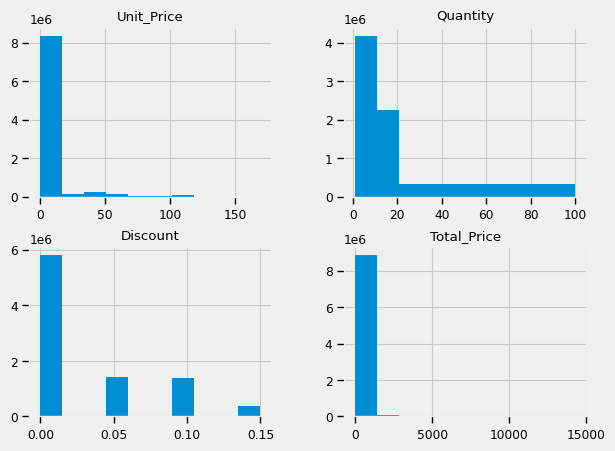

In [24]:
ax =sns.set_context("paper")
# plt.style.use("fivethirtyeight")
ax = plt.figure(figsize = (10, 10))
# ax = plt.title("Histogram for Numerial Columns")

ax = df.hist();

In [ ]:
class DataVisualizatio